In [116]:
# importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Preprocessing

In [117]:
df = pd.read_csv('turnover.csv')

### Understanding the data

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [119]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [120]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [121]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [122]:
df.left.unique()

array([1, 0])

### Encoding 'sales' and 'salary'

In [123]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [127]:
# count unique
df.sales.count()

14999

In [128]:
# count salary

In [10]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

In [13]:
sales_label = label_encoder.fit_transform(df.sales)
sales_label

array([7, 7, 7, ..., 8, 8, 8])

In [14]:
salary_label = pd.get_dummies(df.salary, prefix='sal')
salary_label.head()

,sal_high,sal_low,sal_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [131]:
df_new = pd.concat([df, salary_label], axis=1, join='inner')

In [132]:
sales_label

array([7, 7, 7, ..., 8, 8, 8])

In [133]:
df_new['sales_encoded'] = sales_label
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sal_high,sal_low,sal_medium,sales_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0,7
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1,7
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1,7
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0,7
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0,7


In [134]:
# Removing 'sales' an 'salary' columns (character fields removed and substituted for model purpose
df_new = df_new.drop(['sales','salary'], axis=1)

In [137]:
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sal_high,sal_low,sal_medium,sales_encoded
0,0.38,0.53,2,157,3,0,1,0,0,1,0,7
1,0.80,0.86,5,262,6,0,1,0,0,0,1,7
2,0.11,0.88,7,272,4,0,1,0,0,0,1,7
3,0.72,0.87,5,223,5,0,1,0,0,1,0,7
4,0.37,0.52,2,159,3,0,1,0,0,1,0,7


In [138]:
X = df_new.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sal_high,sal_low,sal_medium,sales_encoded
0,0.38,0.53,2,157,3,0,0,0,1,0,7
1,0.80,0.86,5,262,6,0,0,0,0,1,7
2,0.11,0.88,7,272,4,0,0,0,0,1,7
3,0.72,0.87,5,223,5,0,0,0,1,0,7
4,0.37,0.52,2,159,3,0,0,0,1,0,7


In [139]:
Y = df_new['left']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

## Visualization

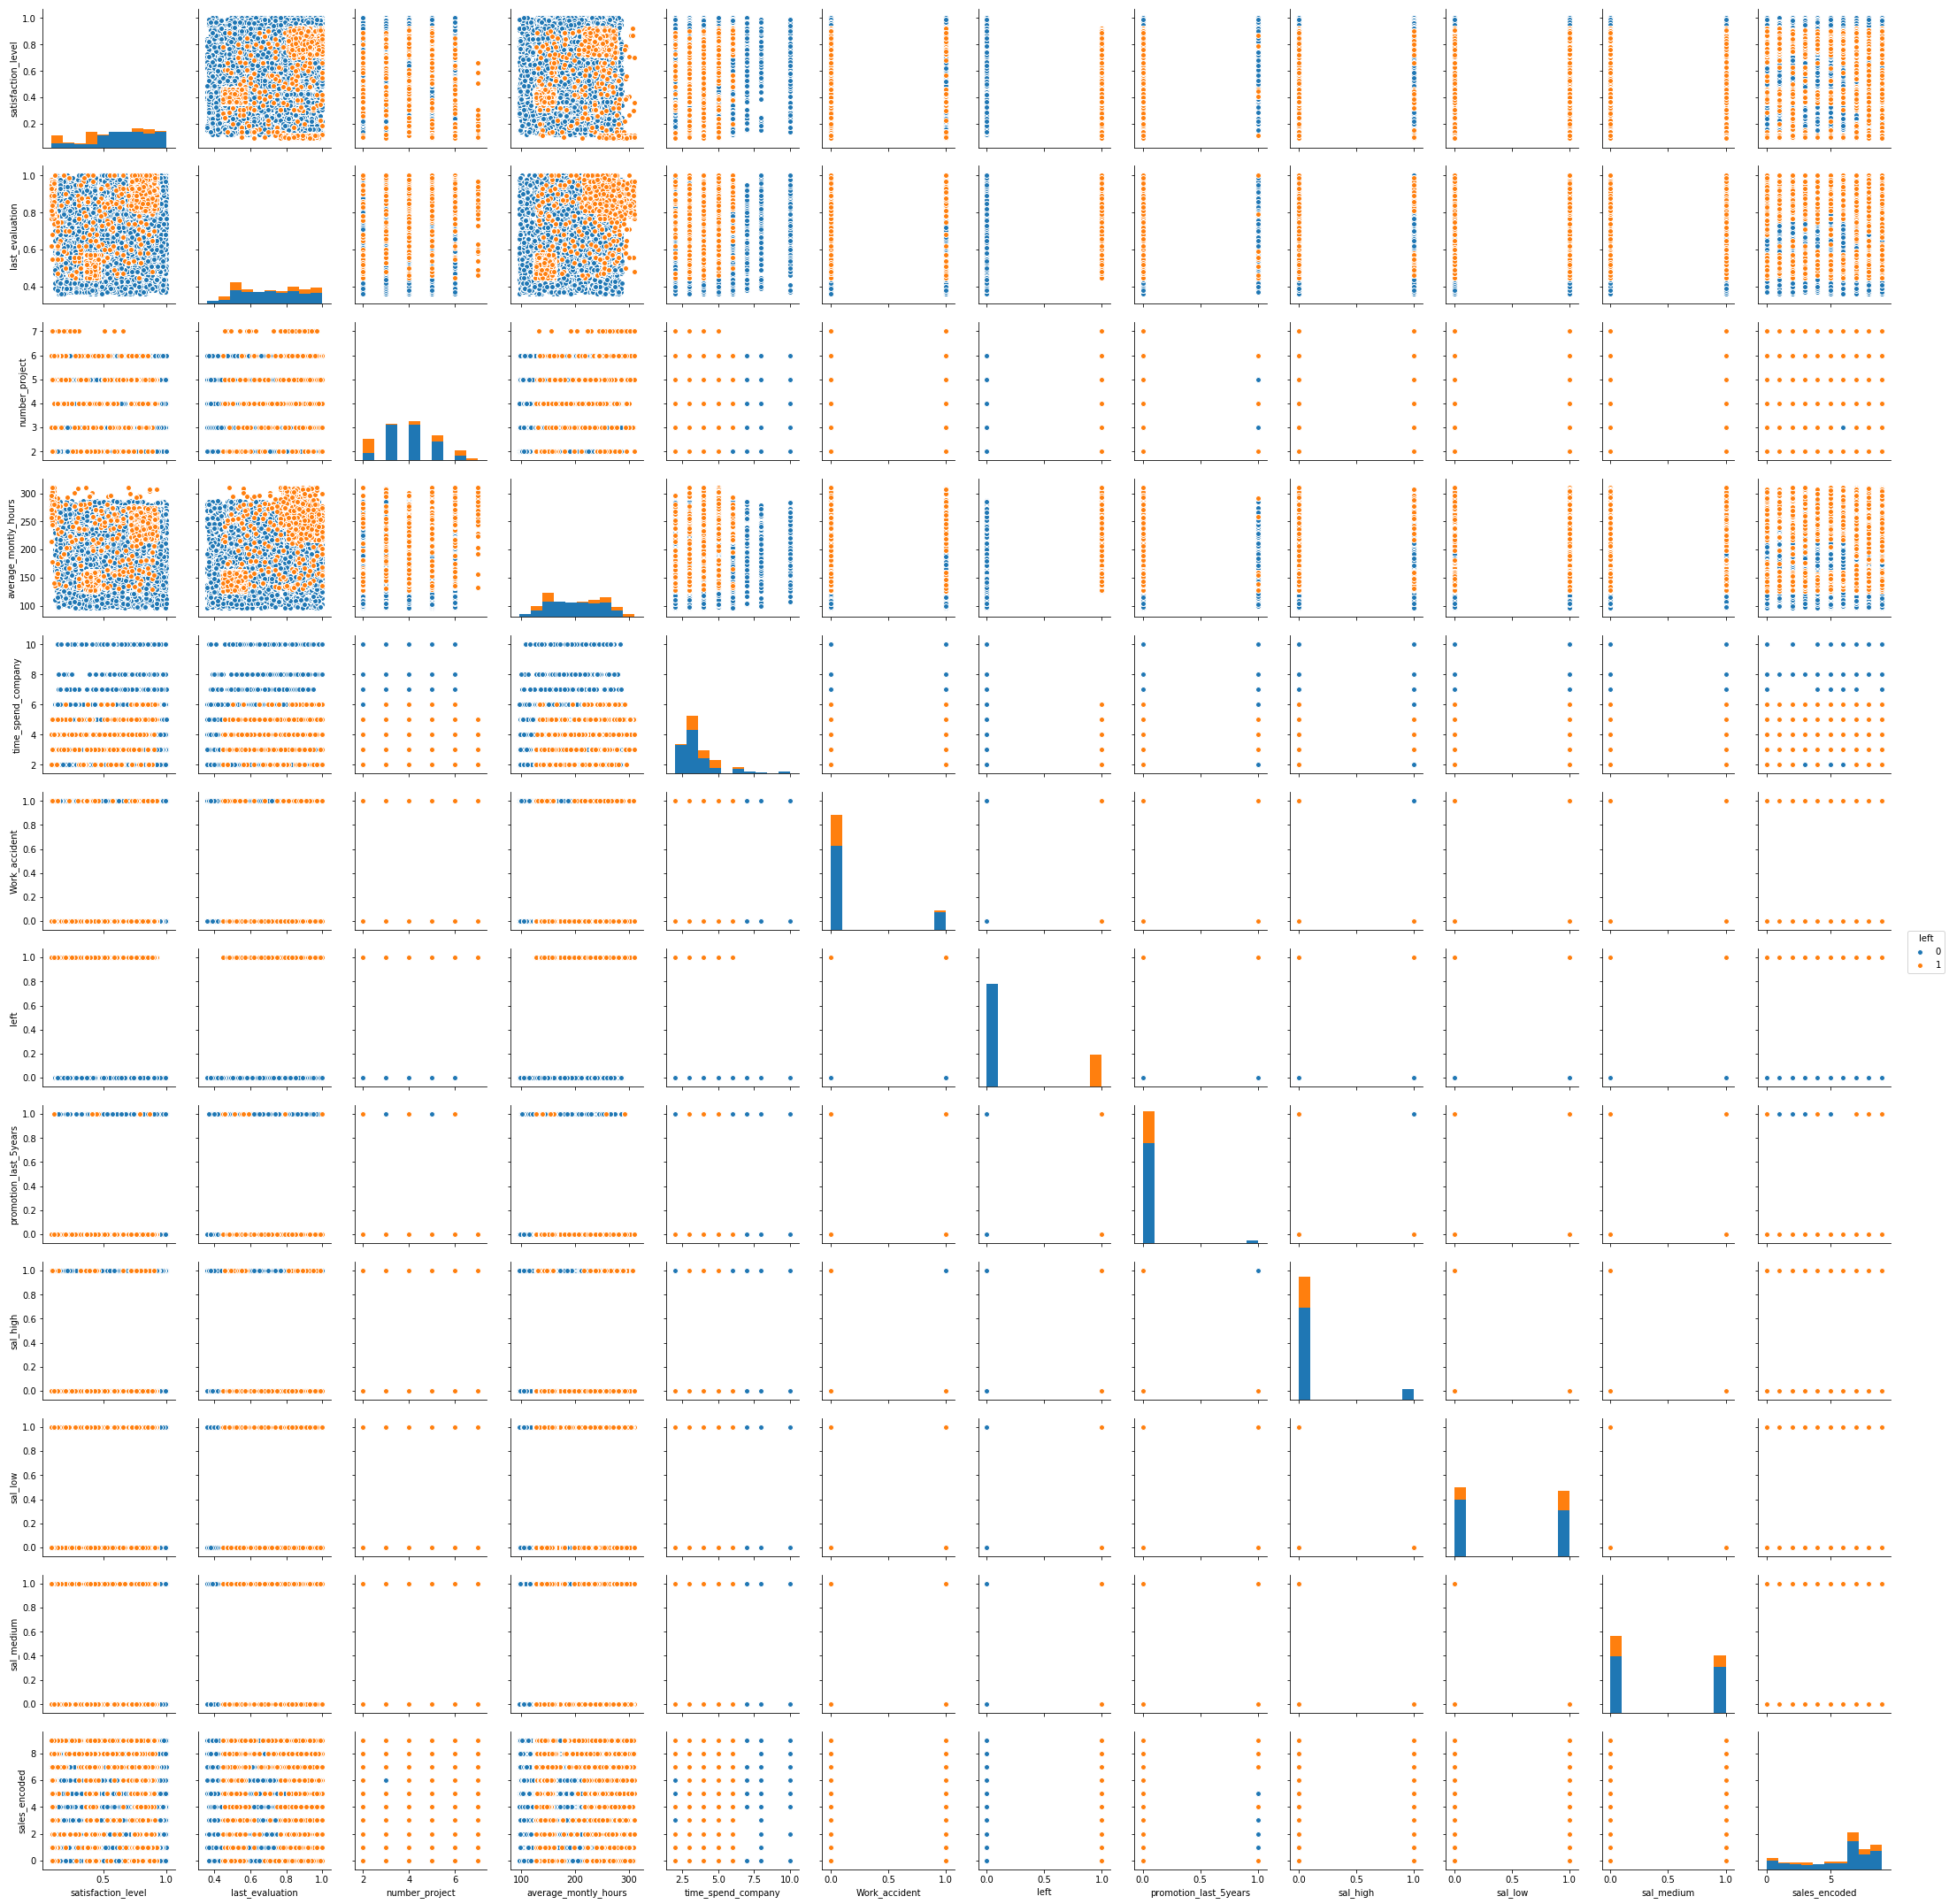

In [78]:
sns.pairplot(df_new, hue='left')

### Standard Scaling

In [140]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

In [141]:
scalar = StandardScaler()

In [142]:
X_normalized = scalar.fit_transform(X)
X_normalized

array([[-0.93649469, -1.08727529, -1.46286291, ...,  1.02477511,
        -0.8681323 ,  0.39372503],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.97582386,
         1.15189816,  0.39372503],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.97582386,
         1.15189816,  0.39372503],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ...,  1.02477511,
        -0.8681323 ,  0.74231612],
       [-2.02247906,  1.42494396,  1.7824382 , ...,  1.02477511,
        -0.8681323 ,  0.74231612],
       [-0.97671633, -1.14569899, -1.46286291, ...,  1.02477511,
        -0.8681323 ,  0.74231612]])

## Training and Cross-Validation

In [143]:
# train-test split
# ideal test size is 30%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [144]:
x_train.shape

(10499, 11)

In [145]:
y_train.shape

(10499,)

In [146]:
x_test.shape

(4500, 11)

In [147]:
y_test.shape

(4500,)

In [148]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [149]:
models = []
models.append(['LR',LogisticRegression()])
models.append(['KNN',KNeighborsClassifier()])
models.append(['SVM',SVC()])
#models.append(['GPC',GaussianProcessClassifier()])
#models.append(['RBF',RBF()])
models.append(['DT',DecisionTreeClassifier()])
models.append(['RF',RandomForestClassifier()])
models.append(['AB',AdaBoostClassifier()])
models.append(['GNB',GaussianNB()])
models.append(['QDA',QuadraticDiscriminantAnalysis()])
models.append(['LDA',LinearDiscriminantAnalysis()])

In [57]:
len(models)

9

In [94]:
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(1000, n_folds=10)

In [95]:
results = []
names = []
for name, model in models:
    print('training...' + name)
    scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    names.append(name)
    results.append([ np.mean(scores), np.std(scores)])
    print(name + ' accuracy(mean):' + str(np.mean(scores)))
    print(name + ' accuracy(std):' + str(np.std(scores)))
    print('.......................................')

training...LR
LR accuracy(mean):0.781
LR accuracy(std):0.02947880594596736
.......................................
training...KNN
KNN accuracy(mean):0.8789999999999999
KNN accuracy(std):0.040607881008493926
.......................................
training...SVM
SVM accuracy(mean):0.9040000000000001
SVM accuracy(std):0.04294182110716779
.......................................
training...DT
DT accuracy(mean):0.953
DT accuracy(std):0.02002498439450076
.......................................
training...RF
RF accuracy(mean):0.9800000000000001
RF accuracy(std):0.011832159566199242
.......................................
training...AB
AB accuracy(mean):0.9480000000000001
AB accuracy(std):0.015362291495737196
.......................................
training...GNB
GNB accuracy(mean):0.688
GNB accuracy(std):0.09754998718605759
.......................................
training...QDA
QDA accuracy(mean):0.7619999999999999
QDA accuracy(std):0.10943491216243564
.......................................


/home/shashwat/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/shashwat/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/shashwat/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/shashwat/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/shashwat/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/shashwat/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("

## Evaluation

In [96]:
results

[[0.781, 0.02947880594596736],
 [0.8789999999999999, 0.040607881008493926],
 [0.9040000000000001, 0.04294182110716779],
 [0.953, 0.02002498439450076],
 [0.9800000000000001, 0.011832159566199242],
 [0.9480000000000001, 0.015362291495737196],
 [0.688, 0.09754998718605759],
 [0.7619999999999999, 0.10943491216243564],
 [0.7809999999999999, 0.028442925306655785]]

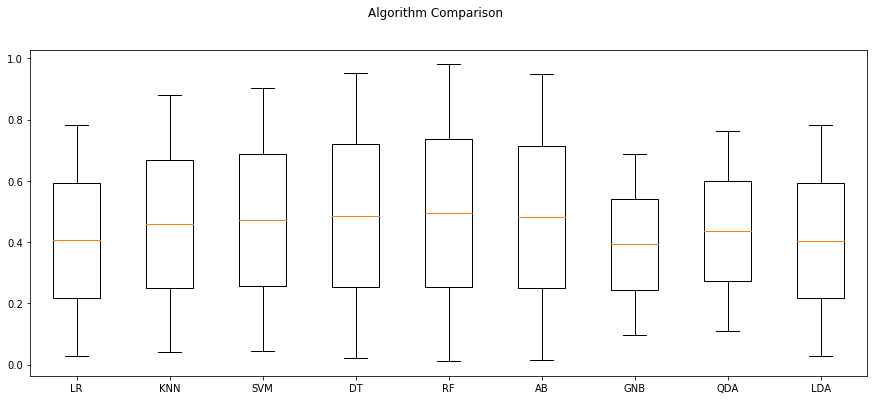

In [97]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [98]:
random_forest = RandomForestClassifier()

In [99]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
predict = random_forest.predict(x_test)

In [103]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3431
          1       0.99      0.96      0.98      1069

avg / total       0.99      0.99      0.99      4500



In [104]:
print(confusion_matrix(y_test, predict))

[[3425    6]
 [  41 1028]]
